<a href="https://colab.research.google.com/github/syh0397/Kaggle-Practice/blob/main/%EA%B2%8C%EC%9E%84%EB%A1%9C%EA%B7%B8_Data_anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
#
import scipy.stats as stats
#
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [3]:

df = pd.read_csv("/content/drive/MyDrive/DATA/appsfl/appsflyer_sample.csv")
df

,User ID,Country Code,Country Name,Event Name,EventTime,Event Value
0,10105,44,United Kingdom,click play,2019-09-18 03:09:41,"{""selected_mission"":""daily_mission"",""user_id"":..."
1,10341,44,United Kingdom,click play,2019-09-18 04:23:35,"{""selected_mission"":""daily_mission"",""user_id"":..."
2,10527,55,Brazil,click play,2019-09-18 12:23:52,"{""selected_mission"":""daily_mission"",""user_id"":..."
3,10527,55,Brazil,click play,2019-09-18 17:04:40,"{""selected_mission"":""daily_mission"",""user_id"":..."
4,10547,55,Brazil,click play,2019-09-18 19:16:23,"{""selected_mission"":""daily_mission"",""user_id"":..."
...,...,...,...,...,...,...
804553,96974,31,Netherlands,click play,2019-10-16 18:37:24,"{""selected_mission"":""daily_mission"",""user_id"":..."
804554,96974,31,Netherlands,click play,2019-10-16 07:04:21,"{""selected_mission"":""special_mission"",""user_id..."
804555,97113,31,Netherlands,click play,2019-10-16 14:18:28,"{""selected_mission"":""daily_mission"",""user_id"":..."
804556,98065,55,Brazil,click play,2019-10-16 23:46:01,"{""selected_mission"":""daily_mission"",""user_id"":..."


In [4]:
df['Country Name'].value_counts()

France               55307
Japan                55165
Italy                54476
China                54375
United Kingdom       54128
Netherlands          53872
Brazil               53829
New Zealand          53678
Indonesia            53497
Republic of Korea    53380
Australia            53270
Belgium              53011
Unites States        52766
Malaysia             51992
Germany              51812
Name: Country Name, dtype: int64

In [5]:
france = df['Country Name'] == 'France'
df = df[france].reset_index()
df.drop('index', axis = 1, inplace = True)
df

,User ID,Country Code,Country Name,Event Name,EventTime,Event Value
0,10689,33,France,click play,2019-09-18 04:24:52,"{""selected_mission"":""daily_mission"",""user_id"":..."
1,10689,33,France,click play,2019-09-18 19:03:01,"{""selected_mission"":""daily_mission"",""user_id"":..."
2,13215,33,France,click play,2019-09-18 11:52:17,"{""selected_mission"":""special_mission"",""user_id..."
3,14067,33,France,click play,2019-09-18 00:31:37,"{""selected_mission"":""community_mission"",""user_..."
4,16255,33,France,click play,2019-09-18 04:20:54,"{""selected_mission"":""daily_mission"",""user_id"":..."
...,...,...,...,...,...,...
55302,88666,33,France,click play,2019-10-16 13:46:17,"{""selected_mission"":""daily_mission"",""user_id"":..."
55303,88899,33,France,click play,2019-10-16 16:17:31,"{""selected_mission"":""daily_mission"",""user_id"":..."
55304,89980,33,France,click play,2019-10-16 17:00:01,"{""selected_mission"":""daily_mission"",""user_id"":..."
55305,93592,33,France,click play,2019-10-16 16:43:21,"{""selected_mission"":""daily_mission"",""user_id"":..."


In [6]:
data = df.copy()

In [7]:
data

,User ID,Country Code,Country Name,Event Name,EventTime,Event Value
0,10689,33,France,click play,2019-09-18 04:24:52,"{""selected_mission"":""daily_mission"",""user_id"":..."
1,10689,33,France,click play,2019-09-18 19:03:01,"{""selected_mission"":""daily_mission"",""user_id"":..."
2,13215,33,France,click play,2019-09-18 11:52:17,"{""selected_mission"":""special_mission"",""user_id..."
3,14067,33,France,click play,2019-09-18 00:31:37,"{""selected_mission"":""community_mission"",""user_..."
4,16255,33,France,click play,2019-09-18 04:20:54,"{""selected_mission"":""daily_mission"",""user_id"":..."
...,...,...,...,...,...,...
55302,88666,33,France,click play,2019-10-16 13:46:17,"{""selected_mission"":""daily_mission"",""user_id"":..."
55303,88899,33,France,click play,2019-10-16 16:17:31,"{""selected_mission"":""daily_mission"",""user_id"":..."
55304,89980,33,France,click play,2019-10-16 17:00:01,"{""selected_mission"":""daily_mission"",""user_id"":..."
55305,93592,33,France,click play,2019-10-16 16:43:21,"{""selected_mission"":""daily_mission"",""user_id"":..."


In [8]:
data["Event Value"] = data["Event Value"].apply(lambda x : dict(eval(x)) )
df3 = data["Event Value"].apply(pd.Series )

In [9]:
df3

,selected_mission,user_id,country_code
0,daily_mission,10689.0000,33
1,daily_mission,10689.0000,33
2,special_mission,13215.0000,33
3,community_mission,14067.0000,33
4,daily_mission,16255.0000,33
...,...,...,...
55302,daily_mission,88666.0000,33
55303,daily_mission,88899.0000,33
55304,daily_mission,89980.0000,33
55305,daily_mission,93592.0000,33


In [10]:
result = pd.concat([data, df3], axis=1).drop('Event Value', axis=1)
result

,User ID,Country Code,Country Name,Event Name,EventTime,selected_mission,user_id,country_code
0,10689,33,France,click play,2019-09-18 04:24:52,daily_mission,10689.0000,33
1,10689,33,France,click play,2019-09-18 19:03:01,daily_mission,10689.0000,33
2,13215,33,France,click play,2019-09-18 11:52:17,special_mission,13215.0000,33
3,14067,33,France,click play,2019-09-18 00:31:37,community_mission,14067.0000,33
4,16255,33,France,click play,2019-09-18 04:20:54,daily_mission,16255.0000,33
...,...,...,...,...,...,...,...,...
55302,88666,33,France,click play,2019-10-16 13:46:17,daily_mission,88666.0000,33
55303,88899,33,France,click play,2019-10-16 16:17:31,daily_mission,88899.0000,33
55304,89980,33,France,click play,2019-10-16 17:00:01,daily_mission,89980.0000,33
55305,93592,33,France,click play,2019-10-16 16:43:21,daily_mission,93592.0000,33


In [11]:
df2 = pd.json_normalize(data['Event Value'])

In [12]:
result['Event Name'].value_counts()

click play    55307
Name: Event Name, dtype: int64

In [13]:
result['selected_mission'].value_counts()

daily_mission        34684
community_mission    15315
special_mission       5308
Name: selected_mission, dtype: int64

In [14]:
df = result.drop(['Country Code','Event Name','user_id'], axis =1 )
df

,User ID,Country Name,EventTime,selected_mission,country_code
0,10689,France,2019-09-18 04:24:52,daily_mission,33
1,10689,France,2019-09-18 19:03:01,daily_mission,33
2,13215,France,2019-09-18 11:52:17,special_mission,33
3,14067,France,2019-09-18 00:31:37,community_mission,33
4,16255,France,2019-09-18 04:20:54,daily_mission,33
...,...,...,...,...,...
55302,88666,France,2019-10-16 13:46:17,daily_mission,33
55303,88899,France,2019-10-16 16:17:31,daily_mission,33
55304,89980,France,2019-10-16 17:00:01,daily_mission,33
55305,93592,France,2019-10-16 16:43:21,daily_mission,33


In [15]:
# 추가로 최소시간 최대시간 체크 , 
print("Min event_time:",min(df['EventTime']))
print("Max event_time:",max(df['EventTime']))

Min event_time: 2019-09-01 00:01:26
Max event_time: 2019-10-26 23:57:50


In [16]:
# 결측치 체크
df.isnull().sum().to_frame('nan_count')

,nan_count
User ID,0
Country Name,0
EventTime,0
selected_mission,0
country_code,0


daily_mission       0.6271
community_mission   0.2769
special_mission     0.0960
Name: selected_mission, dtype: float64


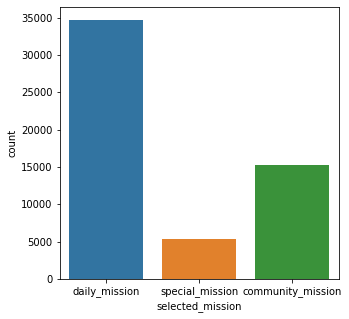

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(df.selected_mission)
plt.xlabel('selected_mission');
print(df['selected_mission'].value_counts(normalize=True))

In [18]:
df

,User ID,Country Name,EventTime,selected_mission,country_code
0,10689,France,2019-09-18 04:24:52,daily_mission,33
1,10689,France,2019-09-18 19:03:01,daily_mission,33
2,13215,France,2019-09-18 11:52:17,special_mission,33
3,14067,France,2019-09-18 00:31:37,community_mission,33
4,16255,France,2019-09-18 04:20:54,daily_mission,33
...,...,...,...,...,...
55302,88666,France,2019-10-16 13:46:17,daily_mission,33
55303,88899,France,2019-10-16 16:17:31,daily_mission,33
55304,89980,France,2019-10-16 17:00:01,daily_mission,33
55305,93592,France,2019-10-16 16:43:21,daily_mission,33


In [19]:
df['date'] = df.EventTime.str.split(' ').str[0]
df['time'] = df.EventTime.str.split(' ').str[1]

In [20]:
df_ = df.copy()
df_sorted = df_.sort_values(by=['User ID', 'date'] ,ascending=True)
df_sorted

,User ID,Country Name,EventTime,selected_mission,country_code,date,time
33767,138,France,2019-10-16 05:56:22,daily_mission,33,2019-10-16,05:56:22
54947,3030,France,2019-10-02 23:50:19,special_mission,33,2019-10-02,23:50:19
7988,3110,France,2019-09-20 16:13:11,community_mission,33,2019-09-20,16:13:11
24977,3110,France,2019-10-17 13:57:36,daily_mission,33,2019-10-17,13:57:36
7086,3164,France,2019-09-01 15:15:59,community_mission,33,2019-09-01,15:15:59
...,...,...,...,...,...,...,...
25110,99759,France,2019-10-22 18:21:22,daily_mission,33,2019-10-22,18:21:22
2235,99812,France,2019-09-13 08:47:04,daily_mission,33,2019-09-13,08:47:04
10133,99812,France,2019-09-19 10:19:31,community_mission,33,2019-09-19,10:19:31
10500,99812,France,2019-09-30 03:56:09,community_mission,33,2019-09-30,03:56:09


In [21]:
df_ = df_sorted.copy()
df_['date_'] = pd.to_datetime(df_.EventTime, format="%Y/%m/%d %H:%M:%S")
# df_['diff'] = df_.date_.diff(axis=0).fillna('NaT')
df_['diff'] = ( df_.date_ - df_.date_.shift(1)).fillna('NaT')
df_.head(10)

,User ID,Country Name,EventTime,selected_mission,country_code,date,time,date_,diff
33767,138,France,2019-10-16 05:56:22,daily_mission,33,2019-10-16,05:56:22,2019-10-16 05:56:22,NaT
54947,3030,France,2019-10-02 23:50:19,special_mission,33,2019-10-02,23:50:19,2019-10-02 23:50:19,-14 days +17:53:57
7988,3110,France,2019-09-20 16:13:11,community_mission,33,2019-09-20,16:13:11,2019-09-20 16:13:11,-13 days +16:22:52
24977,3110,France,2019-10-17 13:57:36,daily_mission,33,2019-10-17,13:57:36,2019-10-17 13:57:36,26 days 21:44:25
7086,3164,France,2019-09-01 15:15:59,community_mission,33,2019-09-01,15:15:59,2019-09-01 15:15:59,-46 days +01:18:23
4494,3164,France,2019-09-21 06:53:27,community_mission,33,2019-09-21,06:53:27,2019-09-21 06:53:27,19 days 15:37:28
26287,3164,France,2019-10-16 16:31:24,daily_mission,33,2019-10-16,16:31:24,2019-10-16 16:31:24,25 days 09:37:57
9917,3605,France,2019-09-21 04:20:31,daily_mission,33,2019-09-21,04:20:31,2019-09-21 04:20:31,-26 days +11:49:07
31466,3605,France,2019-10-06 23:49:21,daily_mission,33,2019-10-06,23:49:21,2019-10-06 23:49:21,15 days 19:28:50
31188,3605,France,2019-10-16 01:52:57,daily_mission,33,2019-10-16,01:52:57,2019-10-16 01:52:57,9 days 02:03:36


In [22]:
cond = df_['diff'] >= '7 days 00:00:00'
k = df_[cond]
print(k.shape)
# print(df_['user_session'].nunique())
k.head()

(7839, 9)


,User ID,Country Name,EventTime,selected_mission,country_code,date,time,date_,diff
24977,3110,France,2019-10-17 13:57:36,daily_mission,33,2019-10-17,13:57:36,2019-10-17 13:57:36,26 days 21:44:25
4494,3164,France,2019-09-21 06:53:27,community_mission,33,2019-09-21,06:53:27,2019-09-21 06:53:27,19 days 15:37:28
26287,3164,France,2019-10-16 16:31:24,daily_mission,33,2019-10-16,16:31:24,2019-10-16 16:31:24,25 days 09:37:57
31466,3605,France,2019-10-06 23:49:21,daily_mission,33,2019-10-06,23:49:21,2019-10-06 23:49:21,15 days 19:28:50
31188,3605,France,2019-10-16 01:52:57,daily_mission,33,2019-10-16,01:52:57,2019-10-16 01:52:57,9 days 02:03:36


In [23]:
# 뒷 이벤트의 날짜보다 7일 이상이면 New를 리턴합니다.

df_['check_'] = np.where(df_['diff'] >= '7 days 00:00:00', 'New', 'False')
df_.head()

,User ID,Country Name,EventTime,selected_mission,country_code,date,time,date_,diff,check_
33767,138,France,2019-10-16 05:56:22,daily_mission,33,2019-10-16,05:56:22,2019-10-16 05:56:22,NaT,False
54947,3030,France,2019-10-02 23:50:19,special_mission,33,2019-10-02,23:50:19,2019-10-02 23:50:19,-14 days +17:53:57,False
7988,3110,France,2019-09-20 16:13:11,community_mission,33,2019-09-20,16:13:11,2019-09-20 16:13:11,-13 days +16:22:52,False
24977,3110,France,2019-10-17 13:57:36,daily_mission,33,2019-10-17,13:57:36,2019-10-17 13:57:36,26 days 21:44:25,New
7086,3164,France,2019-09-01 15:15:59,community_mission,33,2019-09-01,15:15:59,2019-09-01 15:15:59,-46 days +01:18:23,False


In [24]:
# # id값이 바뀌면 true를 가집니다.

df_['coh'] = df_['User ID'].diff().fillna(1.0)
df_['new_session'] = np.where( df_.coh != 0, 'New', 'False')

In [25]:
new_check = df_['check_'] == 'New'
fal_new = df_['new_session'] == 'False'
condi = new_check & fal_new
subset_df = df_[condi]
subset_df

,User ID,Country Name,EventTime,selected_mission,country_code,date,time,date_,diff,check_,coh,new_session
24977,3110,France,2019-10-17 13:57:36,daily_mission,33,2019-10-17,13:57:36,2019-10-17 13:57:36,26 days 21:44:25,New,0.0000,False
4494,3164,France,2019-09-21 06:53:27,community_mission,33,2019-09-21,06:53:27,2019-09-21 06:53:27,19 days 15:37:28,New,0.0000,False
26287,3164,France,2019-10-16 16:31:24,daily_mission,33,2019-10-16,16:31:24,2019-10-16 16:31:24,25 days 09:37:57,New,0.0000,False
31466,3605,France,2019-10-06 23:49:21,daily_mission,33,2019-10-06,23:49:21,2019-10-06 23:49:21,15 days 19:28:50,New,0.0000,False
31188,3605,France,2019-10-16 01:52:57,daily_mission,33,2019-10-16,01:52:57,2019-10-16 01:52:57,9 days 02:03:36,New,0.0000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11648,99751,France,2019-09-30 09:56:51,daily_mission,33,2019-09-30,09:56:51,2019-09-30 09:56:51,13 days 13:19:40,New,0.0000,False
9266,99752,France,2019-09-25 06:25:57,community_mission,33,2019-09-25,06:25:57,2019-09-25 06:25:57,7 days 14:29:15,New,0.0000,False
29723,99752,France,2019-10-04 00:18:00,daily_mission,33,2019-10-04,00:18:00,2019-10-04 00:18:00,8 days 17:52:03,New,0.0000,False
10500,99812,France,2019-09-30 03:56:09,community_mission,33,2019-09-30,03:56:09,2019-09-30 03:56:09,10 days 17:36:38,New,0.0000,False


new_session 값이 new 이거나
id값은 같으면서 이벤트 발생 시간이 7일이 넘는 부분은 새로운 세션으로 간주합니다 !

In [26]:
new = df_['new_session'] == 'New'
new_check = df_['check_'] == 'New'
fal_new = df_['new_session'] == 'False'
condition = new + (new_check & fal_new)
df_['New_sessoion'] = np.where(condition , 'new','exist')
df_

,User ID,Country Name,EventTime,selected_mission,country_code,date,time,date_,diff,check_,coh,new_session,New_sessoion
33767,138,France,2019-10-16 05:56:22,daily_mission,33,2019-10-16,05:56:22,2019-10-16 05:56:22,NaT,False,1.0000,New,new
54947,3030,France,2019-10-02 23:50:19,special_mission,33,2019-10-02,23:50:19,2019-10-02 23:50:19,-14 days +17:53:57,False,2892.0000,New,new
7988,3110,France,2019-09-20 16:13:11,community_mission,33,2019-09-20,16:13:11,2019-09-20 16:13:11,-13 days +16:22:52,False,80.0000,New,new
24977,3110,France,2019-10-17 13:57:36,daily_mission,33,2019-10-17,13:57:36,2019-10-17 13:57:36,26 days 21:44:25,New,0.0000,False,new
7086,3164,France,2019-09-01 15:15:59,community_mission,33,2019-09-01,15:15:59,2019-09-01 15:15:59,-46 days +01:18:23,False,54.0000,New,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25110,99759,France,2019-10-22 18:21:22,daily_mission,33,2019-10-22,18:21:22,2019-10-22 18:21:22,18 days 18:03:22,New,7.0000,New,new
2235,99812,France,2019-09-13 08:47:04,daily_mission,33,2019-09-13,08:47:04,2019-09-13 08:47:04,-40 days +14:25:42,False,53.0000,New,new
10133,99812,France,2019-09-19 10:19:31,community_mission,33,2019-09-19,10:19:31,2019-09-19 10:19:31,6 days 01:32:27,False,0.0000,False,exist
10500,99812,France,2019-09-30 03:56:09,community_mission,33,2019-09-30,03:56:09,2019-09-30 03:56:09,10 days 17:36:38,New,0.0000,False,new


In [27]:
# 컬럼 특성 확인 
df_['New_sessoion'].value_counts(normalize=True)

exist   0.7617
new     0.2383
Name: New_sessoion, dtype: float64

In [31]:
df_ = df_.drop(['date_','check_','coh','new_session'],  axis = 1)

In [32]:
New_sessoion = df_['New_sessoion'] == 'new'
New_sessoion = New_sessoion.to_frame()
New_sessoion

,New_sessoion
33767,True
54947,True
7988,True
24977,True
7086,True
...,...
25110,True
2235,True
10133,False
10500,True


In [33]:
# 세션을 그룹별로 정의해줍니다. 
New_sessoion['Session'] = New_sessoion['New_sessoion'].cumsum()
New_sessoion['Session'] = New_sessoion['Session'].astype(str)

# df와 New_sessoion을 합쳐줍니다.
df = pd.concat([df_, New_sessoion], axis = 1)
df.head()

,User ID,Country Name,EventTime,selected_mission,country_code,date,time,diff,New_sessoion,New_sessoion,Session
33767,138,France,2019-10-16 05:56:22,daily_mission,33,2019-10-16,05:56:22,NaT,new,True,1
54947,3030,France,2019-10-02 23:50:19,special_mission,33,2019-10-02,23:50:19,-14 days +17:53:57,new,True,2
7988,3110,France,2019-09-20 16:13:11,community_mission,33,2019-09-20,16:13:11,-13 days +16:22:52,new,True,3
24977,3110,France,2019-10-17 13:57:36,daily_mission,33,2019-10-17,13:57:36,26 days 21:44:25,new,True,4
7086,3164,France,2019-09-01 15:15:59,community_mission,33,2019-09-01,15:15:59,-46 days +01:18:23,new,True,5


In [34]:
df = df.sort_values(by = ['EventTime'])
df = df.reset_index()

In [35]:
df

,index,User ID,Country Name,EventTime,selected_mission,country_code,date,time,diff,New_sessoion,New_sessoion,Session
0,17585,25658,France,2019-09-01 00:01:26,daily_mission,33,2019-09-01,00:01:26,-1 days +09:36:37,exist,False,2518
1,7113,79615,France,2019-09-01 00:03:04,daily_mission,33,2019-09-01,00:03:04,-53 days +16:18:24,new,True,10380
2,1220,94481,France,2019-09-01 00:03:35,daily_mission,33,2019-09-01,00:03:35,-55 days +12:45:11,new,True,12719
3,13890,40980,France,2019-09-01 00:08:09,daily_mission,33,2019-09-01,00:08:09,-1 days +05:18:53,exist,False,4908
4,13320,80633,France,2019-09-01 00:10:42,special_mission,33,2019-09-01,00:10:42,-9 days +16:46:45,new,True,10510
...,...,...,...,...,...,...,...,...,...,...,...,...
55302,33515,37260,France,2019-10-26 23:55:00,special_mission,33,2019-10-26,23:55:00,0 days 20:33:28,exist,False,4297
55303,27252,25827,France,2019-10-26 23:55:57,community_mission,33,2019-10-26,23:55:57,2 days 01:36:21,exist,False,2567
55304,23933,31658,France,2019-10-26 23:56:43,daily_mission,33,2019-10-26,23:56:43,1 days 17:12:20,exist,False,3449
55305,21781,93663,France,2019-10-26 23:57:49,special_mission,33,2019-10-26,23:57:49,1 days 15:03:50,exist,False,12583


In [36]:
df.to_csv('/content/drive/MyDrive/DATA/appsfl/sessioned2.csv')